Data mining techniques to predict student dropout, classify schools based on performance, and evaluate the performance of different classification algorithms.

## Goals
- Develop a classification model to predict student dropout based on academic performance and attendance data.
- Classify schools into high-performing, average, and low-performing categories based on standardized test scores and resource availability.
- Evaluate the performance of different classification algorithms on the student data.


Activate environment and install requirements.txt

```bash
source base/bin/activate
```

```bash
pip3 install -r requirements.txt
```

```bashsource base/bin/activate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set seaborn style
sns.set(style="whitegrid")


Load Data

In [2]:
# Load the data
courses_df = pd.read_csv('courses.csv')
student_assessment_df = pd.read_csv('studentAssessment.csv')
student_info_df = pd.read_csv('studentInfo.csv')
student_registration_df = pd.read_csv('studentRegistration.csv')

# Display the first few rows of each DataFrame
courses_df.head(), student_assessment_df.head(), student_info_df.head(), student_registration_df.head()

(  code_module code_presentation  module_presentation_length
 0         AAA             2013J                         268
 1         AAA             2014J                         269
 2         BBB             2013J                         268
 3         BBB             2014J                         262
 4         BBB             2013B                         240,
    id_assessment  id_student  date_submitted  is_banked score
 0           1752       11391              18          0    78
 1           1752       28400              22          0    70
 2           1752       31604              17          0    72
 3           1752       32885              26          0    69
 4           1752       38053              19          0    79,
   code_module code_presentation  id_student gender                region  \
 0         AAA             2013J       11391      M   East Anglian Region   
 1         AAA             2013J       28400      F              Scotland   
 2         AAA         

Visualize Data

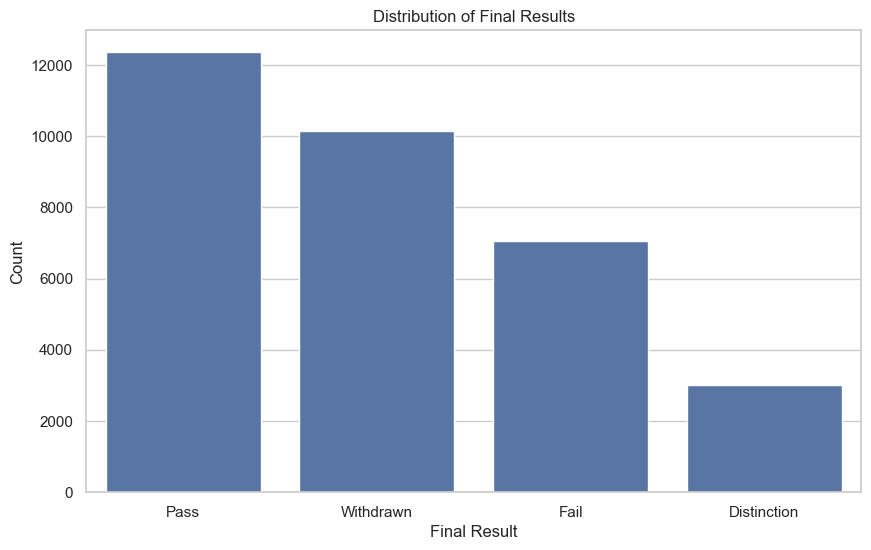

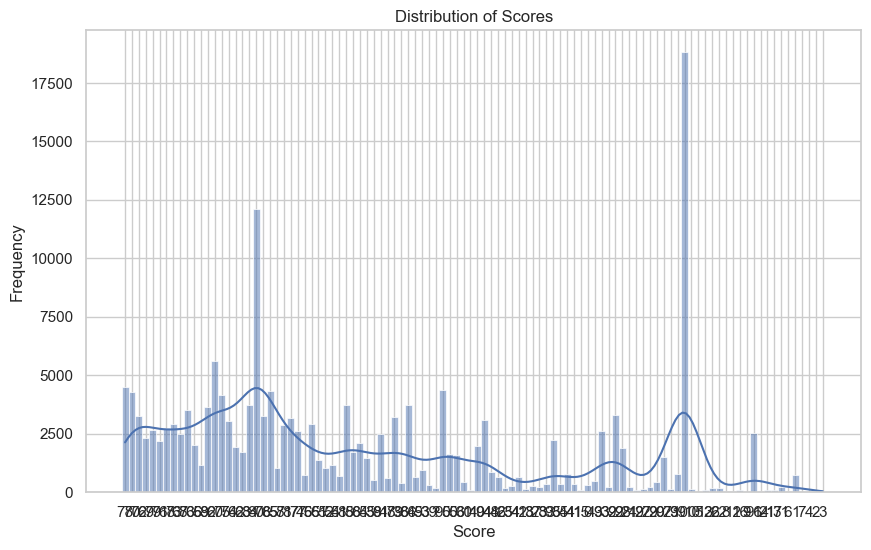

In [3]:
# Plot distribution of final results
plt.figure(figsize=(10, 6))
sns.countplot(data=student_info_df, x='final_result')
plt.title('Distribution of Final Results')
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()

# Plot distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(data=student_assessment_df, x='score', kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Merge Dataframes

In [4]:
# Merge the DataFrames
student_data = pd.merge(student_info_df, student_registration_df, on=['code_module', 'code_presentation', 'id_student'])
student_data = pd.merge(student_data, student_assessment_df, on=['id_student'])

# Display the first few rows of the merged DataFrame
student_data.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159,?,1752,18,0,78
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159,?,1753,53,0,85
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159,?,1754,115,0,80
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159,?,1755,164,0,85
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159,?,1756,212,0,82


Preprocess (ETL) Data

In [5]:
student_data['date_unregistration'] = student_data['date_unregistration'].replace('?', np.nan).astype(float)
student_data['date_registration'] = student_data['date_registration'].replace('?', np.nan).astype(float)

imputer = SimpleImputer(strategy='mean')
student_data['date_registration'] = imputer.fit_transform(student_data[['date_registration']])
student_data['date_unregistration'] = imputer.fit_transform(student_data[['date_unregistration']])

# Convert score to numeric, setting errors='coerce' will turn non-numeric values into NaN
student_data['score'] = pd.to_numeric(student_data['score'], errors='coerce')

# Impute missing values in the score column
student_data['score'] = imputer.fit_transform(student_data[['score']])

# Encode categorical variables
label_encoder = LabelEncoder()
student_data['gender'] = label_encoder.fit_transform(student_data['gender'])
student_data['region'] = label_encoder.fit_transform(student_data['region'])
student_data['highest_education'] = label_encoder.fit_transform(student_data['highest_education'])
student_data['imd_band'] = label_encoder.fit_transform(student_data['imd_band'])
student_data['age_band'] = label_encoder.fit_transform(student_data['age_band'])
student_data['disability'] = label_encoder.fit_transform(student_data['disability'])
student_data['final_result'] = label_encoder.fit_transform(student_data['final_result'])

# Standardize numerical variables
scaler = StandardScaler()
student_data[['studied_credits', 'date_registration', 'date_unregistration', 'date_submitted', 'score']] = scaler.fit_transform(student_data[['studied_credits', 'date_registration', 'date_unregistration', 'date_submitted', 'score']])

student_data.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,1,0,1,9,2,0,4.259053,0,2,-1.887281,-9.557577e-16,1752,-1.331552,0,0.136205
1,AAA,2013J,11391,1,0,1,9,2,0,4.259053,0,2,-1.887281,-9.557577e-16,1753,-0.848613,0,0.503258
2,AAA,2013J,11391,1,0,1,9,2,0,4.259053,0,2,-1.887281,-9.557577e-16,1754,0.006879,0,0.241077
3,AAA,2013J,11391,1,0,1,9,2,0,4.259053,0,2,-1.887281,-9.557577e-16,1755,0.682993,0,0.503258
4,AAA,2013J,11391,1,0,1,9,2,0,4.259053,0,2,-1.887281,-9.557577e-16,1756,1.345309,0,0.345950


Visualize Preprocessed data

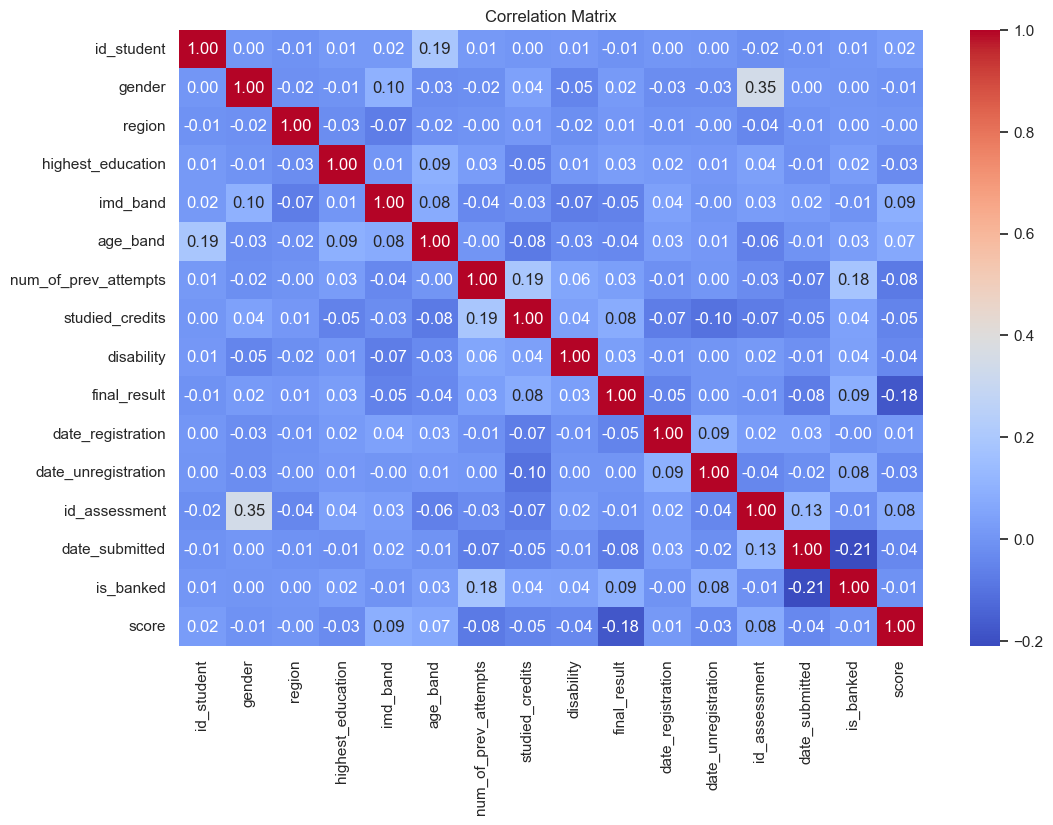

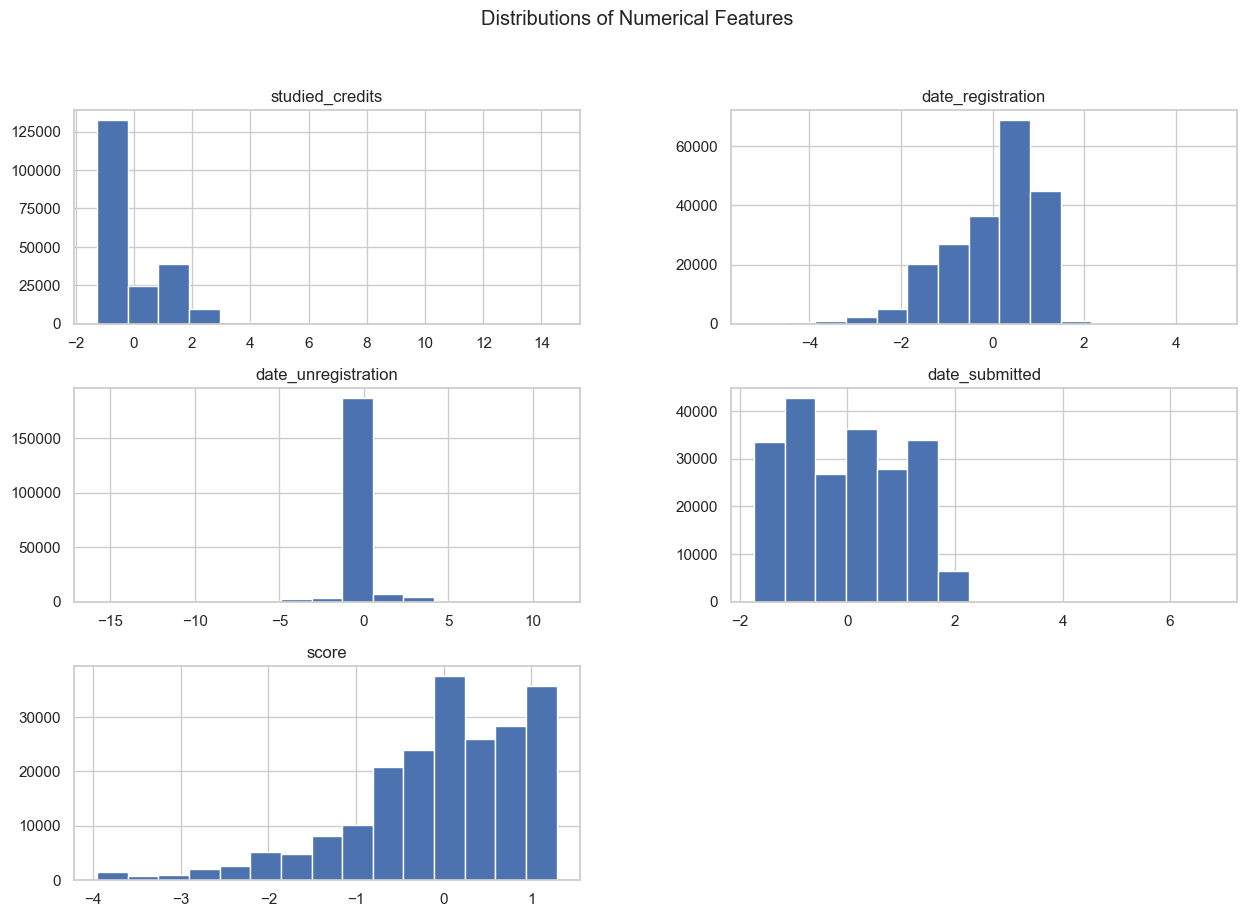

In [6]:
numerical_data = student_data.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot distributions of numerical features
numerical_features = ['studied_credits', 'date_registration', 'date_unregistration', 'date_submitted', 'score']
student_data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Distributions of Numerical Features')
plt.show()

Predict Student Dropout

In [7]:
# Select features and target variable
X = student_data.drop(['final_result', 'id_student', 'code_module', 'code_presentation'], axis=1)
y = student_data['final_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear', max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Logistic Regression Evaluation
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)

# Random Forest Evaluation
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)

# SVM Evaluation
svm_metrics = evaluate_model(y_test, y_pred_svm)

print(f'Logistic Regression - Accuracy: {log_reg_metrics[0]}, Precision: {log_reg_metrics[1]}, Recall: {log_reg_metrics[2]}, F1-Score: {log_reg_metrics[3]}')
print(f'Random Forest - Accuracy: {random_forest_metrics[0]}, Precision: {random_forest_metrics[1]}, Recall: {random_forest_metrics[2]}, F1-Score: {random_forest_metrics[3]}')
print(f'SVM - Accuracy: {svm_metrics[0]}, Precision: {svm_metrics[1]}, Recall: {svm_metrics[2]}, F1-Score: {svm_metrics[3]}')

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
log_reg_values = log_reg_metrics
random_forest_values = random_forest_metrics
svm_values = svm_metrics

x = np.arange(len(labels))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, log_reg_values, width, label='Logistic Regression')
rects2 = ax.bar(x, random_forest_values, width, label='Random Forest')
rects3 = ax.bar(x + width, svm_values, width, label='SVM')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

Classify Schools

In [ ]:
school_data = pd.DataFrame({
    'school_id': range(1, 101),
    'standardized_test_score': np.random.randint(50, 100, size=100),
    'resource_availability': np.random.randint(1, 10, size=100)
})

# Define performance categories
conditions = [
    (school_data['standardized_test_score'] >= 85),
    (school_data['standardized_test_score'] >= 70) & (school_data['standardized_test_score'] < 85),
    (school_data['standardized_test_score'] < 70)
]
choices = ['High', 'Average', 'Low']

school_data['performance_category'] = np.select(conditions, choices)

# Plot distribution of school performance categories
plt.figure(figsize=(10, 6))
sns.countplot(data=school_data, x='performance_category')
plt.title('Distribution of School Performance Categories')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.show()